#**Assignment**
1. Plot the DSRC Basic Safety Messages (Lat/Long from the BSMs)
for both vehicles, for each of the two trials separately (two passes
within a trial should be included in a single plot).
2. Bonus: Overlay the Lat/Long on Google Maps
3. For each individual trial, analyze the data for:

a) Position accuracy compared between vehicles 


*   Trials #1 and #2, where in the respective lanes do the they appear? 
*   Note that the vehicles are in separate standard lanes when passing
*   Take into consideration lane width and vehicle width
*   Does the data look consistent across passes/directions of travel

b) Are there any missed message packets?

#**Submitted By:**
1. 
2. 
3.
4.

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
Rx3000byTx3000= pd.read_csv('Rx3000byTx3000.csv')################### accurate location value of 3000
Rx1000byTx1000= pd.read_csv('Rx1000byTx1000.csv')################### accurate location value of 1000


In [2]:
Rx1000byTx1000['Latitude']
Rx1000byTx1000['Longitude']

NameError: ignored

Length of Actual packets transmitted by 3000 $L_{1000_{act}}=4733$

In [ ]:
Rx3000byTx3000['Latitude']

In [ ]:
Rx3000byTx3000['Longitude']

0       78.126566
1       78.126566
2       78.126566
3       78.126561
4       78.126561
          ...    
6687    78.126587
6688    78.126587
6689    78.126587
6690    78.126586
6691    78.126586
Name: Longitude, Length: 6692, dtype: float64

Length of Actual packets transmitted by 3000 $L_{3000_{act}}=6692$

In [ ]:
Rx3000byTx1000= pd.read_csv('Rx3000byTx1000.csv')
Rx1000byTx3000=pd.read_csv('Rx1000byTx3000.csv')

In [ ]:
Rx3000byTx1000

In [ ]:
Rx3000byTx1000['Longitude']

Length of DSRC lat,long of 1000 recieved by 3000 $L_{1000_{recieved}}=4207$

Missed Packets of 1000 vehicle lat,long values = $L_{1000_{act}}-L_{1000_{recieved}} = 4733-4207=526$ packets

In [ ]:
Rx1000byTx3000

Length of DSRC lat,long of 3000 recieved by 1000 $L_{3000_{recieved}}=3873$

Missed Packets of 3000 vehicle lat,long values = $L_{3000_{act}}-L_{3000_{recieved}} = 6692-3873=2819$ packets

$$Accuracy  =\frac{\text{Difference in location values}}{\text{True value of location}}$$

$$Accuracy  = \frac{\text{Obtained value of location(Using DSRC)}-\text{True value of location}}{\text{True Value}}$$
          

In [ ]:
Difference_3_lat=[]
Difference_3_long=[]
True_value_3_lat=[]
True_value_3_long=[]
#for i in df1_3['GpsEpochTime'].values.tolist(), j in df3['GpsEpochTime'].values.tolist():
for i,j in zip(df1_3['GpsEpochTime'].values.tolist(),df3['GpsEpochTime'].values.tolist()):
  if i==j:
      Difference_3_lat+=abs(df1_3['Latitude'].values.tolist()-df3['Latitude'].values.tolist())
      Difference_3_long+=abs(df1_3['Longitude'].values.tolist()-df3['Longitude'].values.tolist())
      True_value_3_lat+=df3['Latitude'].values
      True_value_3_long+=df3['Longitude'].values

In [ ]:
Accuracy_3_lat=[i/j for i,j in zip(Difference_3_lat, True_value_3_lat)]


[]

In [ ]:
Missed_packets=[]
Missed_3_count=0
list1=[int(i) for i in Rx1000byTx3000['GpsEpochTime'].values.tolist()]
list2=[int(i) for i in Rx3000byTx3000['GpsEpochTime'].values.tolist()]
for i in list1:
  for j in list2:
   if i==j:
    #print(1)
    for k in range(len(Rx1000byTx3000['MsgCount'].values.tolist())-1):
     if (Rx1000byTx3000.loc[k,'MsgCount']-Rx1000byTx3000.loc[k+1,'MsgCount'])!=1:
       Missed_3_count+=1
       #Missed_packets+=df1_3[:,'Msgcount']


KeyboardInterrupt: ignored

In [ ]:
Missed_3_count

134643

In [ ]:
RvDistanceRx3000byTx1000=pd.read_csv('RvDistanceRx3000byTx1000.csv')

In [ ]:
# RvDistanceRx3000byTx1000
i = (Rx3000byTx3000['GpsEpochTime'].values*10).astype(np.int64)[2805]
# print(i)
# i = i.astype(np.int64)
# print(i.dtype)
i

16794686290

In [ ]:
# Rx3000byTx3000
Trial1_RvDistanceRx3000byTx1000=RvDistanceRx3000byTx1000.loc[2800:3182,:]
Trial1_RvDistanceRx3000byTx1000


,RxDevice,RxFileId,RxGenTime,TxDevice,TxFileId,TxGenTime,RxLatitude,RxLongitude,RxHeading,RxSpeed,...,TxLatitude,TxLongitude,TxHeading,TxSpeed,TxYawRate,XDist,YDist,Range,Rdot,RelHeading
2800,3000,55,606553428550920,1000,57,6.065534e+14,17.602380,78.126564,179.11250,0.28,...,17.601525,78.126572,179.66251,1.12,327.670010,94.667572,-0.626628,NaN,NaN,0.550003
2801,3000,55,606553428652072,1000,57,6.065534e+14,17.602380,78.126564,179.11250,0.28,...,17.601526,78.126572,179.66251,1.12,327.670010,94.523407,-0.645646,NaN,NaN,0.550003
2802,3000,55,606553428755986,1000,57,6.065534e+14,17.602379,78.126564,179.11250,0.28,...,17.601527,78.126572,179.66251,1.12,327.670010,94.368172,-0.664492,NaN,NaN,0.550003
2803,3000,55,606553428851118,1000,57,6.065534e+14,17.602381,78.126565,179.11250,0.08,...,17.601528,78.126572,179.66251,1.12,-77.550003,94.456192,-0.697767,NaN,NaN,0.550003
2804,3000,55,606553428954224,1000,57,6.065534e+14,17.602381,78.126565,179.11250,0.08,...,17.601562,78.126567,3.01250,1.52,-86.500000,90.630409,-1.191029,NaN,NaN,176.100010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,3000,55,606553466257220,1000,57,6.065535e+14,17.601512,78.126592,335.91251,1.88,...,17.602520,78.126597,218.53751,2.34,-94.750000,101.609590,-46.093094,NaN,NaN,117.375000
3179,3000,55,606553466355155,1000,57,6.065535e+14,17.601509,78.126587,323.43750,1.94,...,17.602518,78.126597,214.88750,2.34,-89.000000,88.995239,-67.395294,NaN,NaN,108.550000
3180,3000,55,606553466450362,1000,57,6.065535e+14,17.601511,78.126586,323.43750,1.94,...,17.602517,78.126595,215.22501,2.34,-225.560000,88.864426,-67.218773,NaN,NaN,108.212490
3181,3000,55,606553466549112,1000,57,6.065535e+14,17.601512,78.126584,323.43750,1.94,...,17.602517,78.126595,215.22501,2.34,-225.560000,88.670319,-67.220367,NaN,NaN,108.212490


In [ ]:
Rx1000byTx3000

In [ ]:
############################# TRIAL 1 STARTED ###################################
Trial1_RvDistanceRx3000byTx1000=RvDistanceRx3000byTx1000.loc[2800:3182,:]
Tx_Start_index=0
for i in Rx3000byTx3000['GenTime'].values.tolist():
  Rx_Start_index=0
  if i==Trial1_RvDistanceRx3000byTx1000['RxGenTime'].values.tolist()[0]:
    # print(Rx3000byTx3000['GpsEpochTime'].values.tolist()[j])
    # print((Rx3000byTx3000['GpsEpochTime'].values*10).astype(np.int64)[j])
    for k in (Rx1000byTx3000['GpsEpochTime'].values*10).astype(np.int64).tolist():
      if k == (Rx3000byTx3000['GpsEpochTime'].values*10).astype(np.int64)[Tx_Start_index]:
      #  print(Rx1000byTx3000['MsgCount'].values[Rx_Start_index])
      #  print(Rx_Start_index)
       break
      Rx_Start_index+=1
    # print(Tx_Start_index)
    break
  Tx_Start_index+=1

##############################################

Tx_end_index=0
for i in Rx3000byTx3000['GenTime'].values.tolist():
  Rx_end_index=0
  if i==Trial1_RvDistanceRx3000byTx1000['RxGenTime'].values.tolist()[-1]:
    # print(Rx3000byTx3000['GpsEpochTime'].values.tolist()[j])
    # print((Rx3000byTx3000['GpsEpochTime'].values*10).astype(np.int64)[j])
    for k in (Rx1000byTx3000['GpsEpochTime'].values*10).astype(np.int64).tolist():
      if k == (Rx3000byTx3000['GpsEpochTime'].values*10).astype(np.int64)[Tx_end_index]:
      #  print(Rx1000byTx3000['MsgCount'].values[Rx_end_index])
      #  print(b)
       break
      Rx_end_index+=1
    # print(a)
    break
  Tx_end_index+=1
Tx_packets = Tx_end_index-Tx_Start_index
Rx_packets = Rx_end_index-Rx_Start_index
print("tx_packets",Tx_packets)
print("Rx_Packets",Rx_packets)
print("Missed Packets by Vehicle 1 in Trial 1 both pases: ",Tx_packets-Rx_packets)
accuracy = (Rx_packets/Tx_packets)*100
print("Accuracy in Trial 1 for VEhicle 1",accuracy)

tx_packets 382
Rx_Packets 160
Missed Packets by Vehicle 1 in Trial 1 both pases:  222
Accuracy in Trial 1 for VEhicle 1 41.8848167539267


In [ ]:
Tx_Start_index=0
for i in Rx1000byTx1000['GenTime'].values.tolist():
  Rx_Start_index=0
  if i==Trial1_RvDistanceRx3000byTx1000['TxGenTime'].values.tolist()[0]:
    for k in (Rx3000byTx1000['GpsEpochTime'].values*10).astype(np.int64).tolist():
      if k == (Rx1000byTx1000['GpsEpochTime'].values*10).astype(np.int64)[Tx_Start_index]:
       break
      Rx_Start_index+=1
    break
  Tx_Start_index+=1

##############################################

Tx_end_index=0
for i in Rx1000byTx1000['GenTime'].values.tolist():
  Rx_end_index=0
  if i==Trial1_RvDistanceRx3000byTx1000['TxGenTime'].values.tolist()[-1]:
    # print(Rx1000byTx1000['GpsEpochTime'].values.tolist()[j])
    # print((Rx1000byTx1000['GpsEpochTime'].values*10).astype(np.int64)[j])

    for k in (Rx3000byTx1000['GpsEpochTime'].values*10).astype(np.int64).tolist():
      if k == (Rx1000byTx1000['GpsEpochTime'].values*10).astype(np.int64)[Tx_end_index]:
       break
      Rx_end_index+=1
    break
  Tx_end_index+=1
Tx_packets = Tx_end_index-Tx_Start_index
Rx_packets = Rx_end_index-Rx_Start_index
print("tx_packets",Tx_packets)
print("Rx_Packets",Rx_packets)
print("Missed Packets by Vehicle 2 in Trial 1 both pases: ",Tx_packets-Rx_packets)
accuracy = (Rx_packets/Tx_packets)*100
print("Accuracy in Trial 1 for VEhicle 2",accuracy)

tx_packets 380
Rx_Packets 156
Missed Packets by Vehicle 2 in Trial 1 both pases:  224
Accuracy in Trial 1 for VEhicle 2 41.05263157894737


In [ ]:
############################# TRIAL 2 STARTED ###################################
Trial2_RvDistanceRx3000byTx1000=RvDistanceRx3000byTx1000.loc[5201:6080,:]
Tx_Start_index=0
for i in Rx3000byTx3000['GenTime'].values.tolist():
  Rx_Start_index=0
  if i==Trial2_RvDistanceRx3000byTx1000['RxGenTime'].values.tolist()[0]:
    for k in (Rx1000byTx3000['GpsEpochTime'].values*10).astype(np.int64).tolist():
      if k == (Rx3000byTx3000['GpsEpochTime'].values*10).astype(np.int64)[Tx_Start_index]:
       break
      Rx_Start_index+=1
    break
  Tx_Start_index+=1

##############################################

Tx_end_index=0
for i in Rx3000byTx3000['GenTime'].values.tolist():
  Rx_end_index=0
  if i==Trial2_RvDistanceRx3000byTx1000['RxGenTime'].values.tolist()[-1]:
    for k in (Rx1000byTx3000['GpsEpochTime'].values*10).astype(np.int64).tolist():
      if k == (Rx3000byTx3000['GpsEpochTime'].values*10).astype(np.int64)[Tx_end_index]:
       break
      Rx_end_index+=1
    break
  Tx_end_index+=1
Tx_packets = Tx_end_index-Tx_Start_index
Rx_packets = Rx_end_index-Rx_Start_index
print("tx_packets",Tx_packets)
print("Rx_Packets",Rx_packets)
print("Missed Packets by Vehicle 1 in Trial 2 both pases: ",Tx_packets-Rx_packets)
accuracy = (Rx_packets/Tx_packets)*100
print("Accuracy in Trial 2 for VEhicle 1",accuracy)

tx_packets 879
Rx_Packets 811
Missed Packets by Vehicle 1 in Trial 1 both pases:  68
Accuracy in Trial 1 for VEhicle 1 92.26393629124004


In [ ]:
Tx_Start_index=0
for i in Rx1000byTx1000['GenTime'].values.tolist():
  Rx_Start_index=0
  if i==Trial2_RvDistanceRx3000byTx1000['TxGenTime'].values.tolist()[0]:
    for k in (Rx3000byTx1000['GpsEpochTime'].values*10).astype(np.int64).tolist():
      if k == (Rx1000byTx1000['GpsEpochTime'].values*10).astype(np.int64)[Tx_Start_index]:
       break
      Rx_Start_index+=1
    break
  Tx_Start_index+=1

##############################################

Tx_end_index=0
for i in Rx1000byTx1000['GenTime'].values.tolist():
  Rx_end_index=0
  if i==Trial2_RvDistanceRx3000byTx1000['TxGenTime'].values.tolist()[-1]:
    # print(Rx1000byTx1000['GpsEpochTime'].values.tolist()[j])
    # print((Rx1000byTx1000['GpsEpochTime'].values*10).astype(np.int64)[j])

    for k in (Rx3000byTx1000['GpsEpochTime'].values*10).astype(np.int64).tolist():
      if k == (Rx1000byTx1000['GpsEpochTime'].values*10).astype(np.int64)[Tx_end_index]:
       break
      Rx_end_index+=1
    break
  Tx_end_index+=1
Tx_packets = Tx_end_index-Tx_Start_index
Rx_packets = Rx_end_index-Rx_Start_index
print("tx_packets",Tx_packets)
print("Rx_Packets",Rx_packets)
print("Missed Packets by Vehicle 2 in Trial 2 both pases: ",Tx_packets-Rx_packets)
accuracy = (Rx_packets/Tx_packets)*100
print("Accuracy in Trial 2 for VEhicle 2",accuracy)

tx_packets 879
Rx_Packets 807
Missed Packets by Vehicle 2 in Trial 2 both pases:  72
Accuracy in Trial 2 for VEhicle 2 91.80887372013652


Now by indexes i1 and i2 , we will find gpsepoch time of file Rx1000by3000 and note down the indexes again to find the the total recieved packets by 1000

In [ ]:
def findElements(lst1, lst2):
    return [lst1[i] for i in lst2]
findElements([Rx1000byTx3000['GpsEpochTime'].values.tolist()],Tx_pck_list_index_3000)

IndexError: ignored

In [ ]:
#Gps_epoch_3000

In [ ]:

Gps_epoch_3000_1st=int(Gps_epoch_3000[0]*10)
#Gps_epoch_3000_1st=int(Gps_epoch_3000[0])
Gps_epoch_3000_last=int(Gps_epoch_3000[len(Gps_epoch_3000)-1]*10)
#Gps_epoch_3000_last=int(Gps_epoch_3000[len(Gps_epoch_3000)-1])
R=[Gps_epoch_3000_1st,Gps_epoch_3000_last]
R

[16794683485, 16794690176]

In [ ]:
Rx1000byTx3000

,RxDevice,FileID,TxDevice,GenTime,FileMsgCount,GpsEpochTime,TxRandom,MsgCount,DSecond,Latitude,...,WhlBrkLR,WhlBrkRF,WhlBrkRR,Width,Length,EtcActive,AbsActive,EscActive,BrakeBstActive,AuxBrakesActive
0,1000,56,3000,606553296577354,1,1.679468e+09,40542,4,36600,17.601747,...,0,0,1,185,471,0,0,0,0,0
1,1000,56,3000,606553296678556,2,1.679468e+09,40542,5,36749,17.601747,...,0,0,1,185,471,0,0,0,0,0
2,1000,56,3000,606553296783929,3,1.679468e+09,40542,6,36850,17.601747,...,0,0,1,185,471,0,0,0,0,0
3,1000,56,3000,606553296883052,4,1.679468e+09,40542,7,36949,17.601747,...,0,0,1,185,471,0,0,0,0,0
4,1000,56,3000,606553296980768,5,1.679468e+09,40542,8,37049,17.601747,...,0,0,1,185,471,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,1000,56,3000,606553775604557,3870,1.679469e+09,40542,59,35700,17.602365,...,0,0,1,185,471,0,0,0,0,0
3869,1000,56,3000,606553775700818,3871,1.679469e+09,40542,60,35800,17.602367,...,0,0,1,185,471,0,0,0,0,0
3870,1000,56,3000,606553775801676,3872,1.679469e+09,40542,61,35900,17.602368,...,0,0,1,185,471,0,0,0,0,0
3871,1000,56,3000,606553775906606,3873,1.679469e+09,40542,62,36000,17.602372,...,0,0,1,185,471,0,0,0,0,0


In [ ]:
#gps_epoch_1000_3000=[round(i,3) for i in Rx1000byTx3000['GpsEpochTime'].values.tolist()]
gps_epoch_1000_3000=[int(i) for i in Rx1000byTx3000['GpsEpochTime'].values.tolist()]
gps_epoch_1000_3000

In [ ]:
N= []

for i in range(len(R)):

    if R[i] in gps_epoch_1000_3000:
        N.append(i)


[]

In [ ]:
count=0
for Gps_epoch_3000_1st in gps_epoch_1000_3000:
  count+=1

In [ ]:
RvDistanceRx3000byTx1000.loc[2800:3182,:]

,RxDevice,RxFileId,RxGenTime,TxDevice,TxFileId,TxGenTime,RxLatitude,RxLongitude,RxHeading,RxSpeed,...,TxLatitude,TxLongitude,TxHeading,TxSpeed,TxYawRate,XDist,YDist,Range,Rdot,RelHeading
2800,3000,55,606553428550920,1000,57,6.065534e+14,17.602380,78.126564,179.11250,0.28,...,17.601525,78.126572,179.66251,1.12,327.670010,94.667572,-0.626628,NaN,NaN,0.550003
2801,3000,55,606553428652072,1000,57,6.065534e+14,17.602380,78.126564,179.11250,0.28,...,17.601526,78.126572,179.66251,1.12,327.670010,94.523407,-0.645646,NaN,NaN,0.550003
2802,3000,55,606553428755986,1000,57,6.065534e+14,17.602379,78.126564,179.11250,0.28,...,17.601527,78.126572,179.66251,1.12,327.670010,94.368172,-0.664492,NaN,NaN,0.550003
2803,3000,55,606553428851118,1000,57,6.065534e+14,17.602381,78.126565,179.11250,0.08,...,17.601528,78.126572,179.66251,1.12,-77.550003,94.456192,-0.697767,NaN,NaN,0.550003
2804,3000,55,606553428954224,1000,57,6.065534e+14,17.602381,78.126565,179.11250,0.08,...,17.601562,78.126567,3.01250,1.52,-86.500000,90.630409,-1.191029,NaN,NaN,176.100010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,3000,55,606553466257220,1000,57,6.065535e+14,17.601512,78.126592,335.91251,1.88,...,17.602520,78.126597,218.53751,2.34,-94.750000,101.609590,-46.093094,NaN,NaN,117.375000
3179,3000,55,606553466355155,1000,57,6.065535e+14,17.601509,78.126587,323.43750,1.94,...,17.602518,78.126597,214.88750,2.34,-89.000000,88.995239,-67.395294,NaN,NaN,108.550000
3180,3000,55,606553466450362,1000,57,6.065535e+14,17.601511,78.126586,323.43750,1.94,...,17.602517,78.126595,215.22501,2.34,-225.560000,88.864426,-67.218773,NaN,NaN,108.212490
3181,3000,55,606553466549112,1000,57,6.065535e+14,17.601512,78.126584,323.43750,1.94,...,17.602517,78.126595,215.22501,2.34,-225.560000,88.670319,-67.220367,NaN,NaN,108.212490


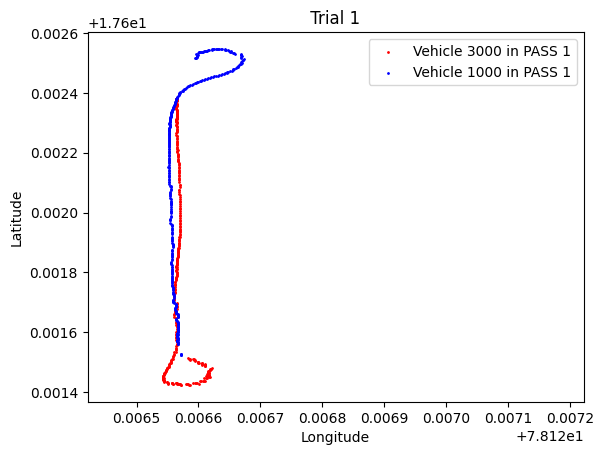

In [ ]:
plt.scatter(RvDistanceRx3000byTx1000.loc[2800:3182,'RxLongitude'].values,RvDistanceRx3000byTx1000.loc[2800:3182,'RxLatitude'].values,s=1,color='r')
plt.scatter(RvDistanceRx3000byTx1000.loc[2800:3182,'TxLongitude'].values,RvDistanceRx3000byTx1000.loc[2800:3182,'TxLatitude'].values,s=1,color='b')

#plt.scatter(Accuracy_1000_lat,Accuracy_1000_long,s=1,color='b')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title(' Trial 1 ')
plt.legend(['Vehicle 3000 in PASS 1','Vehicle 1000 in PASS 1'])
plt.xlim([78.126421,78.127222])
plt.show()

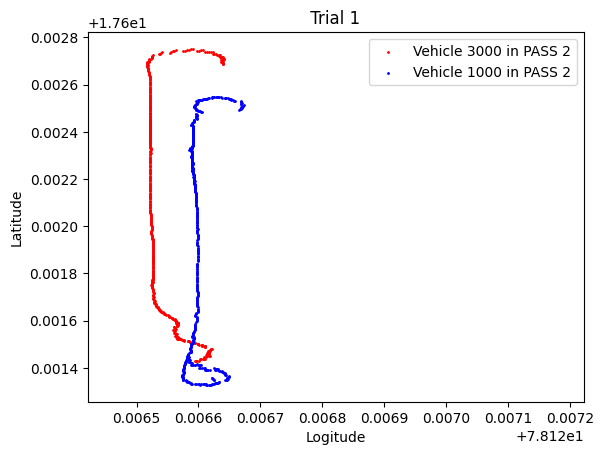

In [ ]:
plt.scatter(RvDistanceRx3000byTx1000.loc[3125:3700,'RxLongitude'].values,RvDistanceRx3000byTx1000.loc[3125:3700,'RxLatitude'].values,s=1,color='r')
plt.scatter(RvDistanceRx3000byTx1000.loc[3125:3700,'TxLongitude'].values,RvDistanceRx3000byTx1000.loc[3125:3700,'TxLatitude'].values,s=1,color='b')

#plt.scatter(Accuracy_1000_lat,Accuracy_1000_long,s=1,color='b')
plt.ylabel('Latitude')
plt.xlabel('Logitude')
plt.title(' Trial 1 ')
plt.legend(['Vehicle 3000 in PASS 2','Vehicle 1000 in PASS 2'])
plt.xlim([78.126421,78.127222])
plt.show()

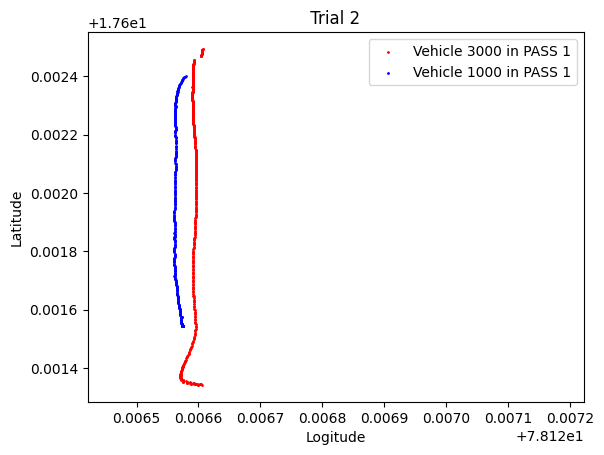

In [ ]:
plt.scatter(RvDistanceRx3000byTx1000.loc[5201:5667,'RxLongitude'].values,RvDistanceRx3000byTx1000.loc[5201:5667,'RxLatitude'].values,s=1,color='r')
plt.scatter(RvDistanceRx3000byTx1000.loc[5201:5585,'TxLongitude'].values,RvDistanceRx3000byTx1000.loc[5201:5585,'TxLatitude'].values,s=1,color='b')
# plt.scatter(Recieve_data.loc[3181:5201,'TxLongitude'].values,Recieve_data.loc[3181:5201,'TxLatitude'].values,s=1,color='c')

#plt.scatter(Accuracy_1000_lat,Accuracy_1000_long,s=1,color='b')
plt.ylabel('Latitude')
plt.xlabel('Logitude')
plt.title(' Trial 2 ')
plt.legend(['Vehicle 3000 in PASS 1','Vehicle 1000 in PASS 1'])
plt.xlim([78.126421,78.127222])
plt.show()

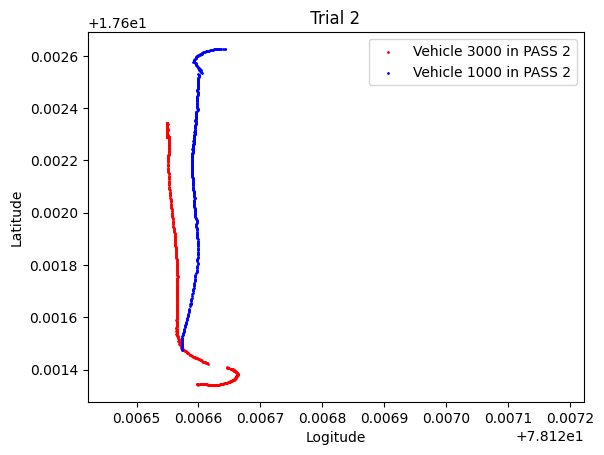

In [ ]:
plt.scatter(RvDistanceRx3000byTx1000.loc[5660:6200,'RxLongitude'].values,RvDistanceRx3000byTx1000.loc[5660:6200,'RxLatitude'].values,s=1,color='r')
plt.scatter(RvDistanceRx3000byTx1000.loc[5700:6080,'TxLongitude'].values,RvDistanceRx3000byTx1000.loc[5700:6080,'TxLatitude'].values,s=1,color='b')
# plt.scatter(Recieve_data.loc[3181:5201,'TxLongitude'].values,Recieve_data.loc[3181:5201,'TxLatitude'].values,s=1,color='c')

#plt.scatter(Accuracy_1000_lat,Accuracy_1000_long,s=1,color='b')
plt.ylabel('Latitude')
plt.xlabel('Logitude')
plt.title(' Trial 2 ')
plt.legend(['Vehicle 3000 in PASS 2','Vehicle 1000 in PASS 2'])
plt.xlim([78.126421,78.127222])
plt.show()

In [ ]:
Rx3000byTx1000=pd.read_csv('Rx3000byTx3000.csv')
Rx3000byTx1000

,RxDevice,FileID,TxDevice,GenTime,FileMsgCount,GpsEpochTime,TxRandom,MsgCount,DSecond,Latitude,...,WhlBrkLR,WhlBrkRF,WhlBrkRR,Width,Length,EtcActive,AbsActive,EscActive,BrakeBstActive,AuxBrakesActive
0,3000,55,3000,606553148527944,1,1.679468e+09,40542,61,8550,17.601755,...,0,0,1,185,471,0,0,0,0,0
1,3000,55,3000,606553148600034,2,1.679468e+09,40542,62,8649,17.601755,...,0,0,1,185,471,0,0,0,0,0
2,3000,55,3000,606553148696908,3,1.679468e+09,40542,63,8750,17.601755,...,0,0,1,185,471,0,0,0,0,0
3,3000,55,3000,606553148794315,4,1.679468e+09,40542,64,8799,17.601761,...,0,0,1,185,471,0,0,0,0,0
4,3000,55,3000,606553148892632,5,1.679468e+09,40542,65,8899,17.601761,...,0,0,1,185,471,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,3000,55,3000,606553817228008,6688,1.679469e+09,40542,92,17350,17.601498,...,0,0,1,185,471,0,0,0,0,0
6688,3000,55,3000,606553817329173,6689,1.679469e+09,40542,93,17450,17.601494,...,0,0,1,185,471,0,0,0,0,0
6689,3000,55,3000,606553817425265,6690,1.679469e+09,40542,94,17500,17.601492,...,0,0,1,185,471,0,0,0,0,0
6690,3000,55,3000,606553817530363,6691,1.679469e+09,40542,95,17650,17.601486,...,0,0,1,185,471,0,0,0,0,0


In [ ]:
required_df = Rx3000byTx1000.query("GenTime==606553429150237")
required_df

,RxDevice,FileID,TxDevice,GenTime,FileMsgCount,GpsEpochTime,TxRandom,MsgCount,DSecond,Latitude,...,WhlBrkLR,WhlBrkRF,WhlBrkRR,Width,Length,EtcActive,AbsActive,EscActive,BrakeBstActive,AuxBrakesActive
2806,3000,55,3000,606553429150237,2807,1.679469e+09,40542,51,49199,17.602381,...,0,0,1,185,471,0,0,0,0,0


In [ ]:
x=3.148256
y = "{:.2f}".format(x)
y
z = round(x,2)
z

3.15